In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

In [34]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Read the IMDb data from a CSV file
data = pd.read_csv('imdb_top_1000.csv')
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [35]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [37]:
# Function to calculate major moments of IMDb ratings
def calculate_moments(data):
    # Convert 'IMDB_Rating' column to numeric
    data['IMDB_Rating'] = pd.to_numeric(data['IMDB_Rating'], errors='coerce')
    data.dropna(subset=['IMDB_Rating'], inplace=True)

    # Calculate moments
    moments = {
        'Mean': data['IMDB_Rating'].mean(),
        'Median': data['IMDB_Rating'].median(),
        'Standard Deviation': data['IMDB_Rating'].std(),
        'Skewness': stats.skew(data['IMDB_Rating']),
        'Kurtosis': stats.kurtosis(data['IMDB_Rating'])
    }

    return moments

# Function to generate correlation matrix
def generate_correlation_matrix(data):
    # Select numeric columns for correlation analysis
    numeric_columns = data.select_dtypes(include=np.number).columns

    # Compute correlation matrix
    correlation_matrix = data[numeric_columns].corr()

    return correlation_matrix

# Function to get basic descriptive statistics
def basic_describe(data):
    return data.describe()

# Assuming 'data' is your DataFrame containing the IMDb data
moments = calculate_moments(data)
correlation_matrix = generate_correlation_matrix(data)
descriptive_stats = basic_describe(data)

# Print major moments
print("Major Moments:")
for moment, value in moments.items():
    print(f"{moment}: {value}")

# Print correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print descriptive statistics
print("\nDescriptive Statistics:")
print(descriptive_stats)

Major Moments:
Mean: 7.949299999999999
Median: 7.9
Standard Deviation: 0.27549120749200917
Skewness: 1.015438370882792
Kurtosis: 1.4195793796976544

Correlation Matrix:
             IMDB_Rating  Meta_score  No_of_Votes
IMDB_Rating     1.000000    0.268531     0.494979
Meta_score      0.268531    1.000000    -0.018507
No_of_Votes     0.494979   -0.018507     1.000000

Descriptive Statistics:
       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [38]:
# Drop any rows with missing values
data.dropna(inplace=True) 

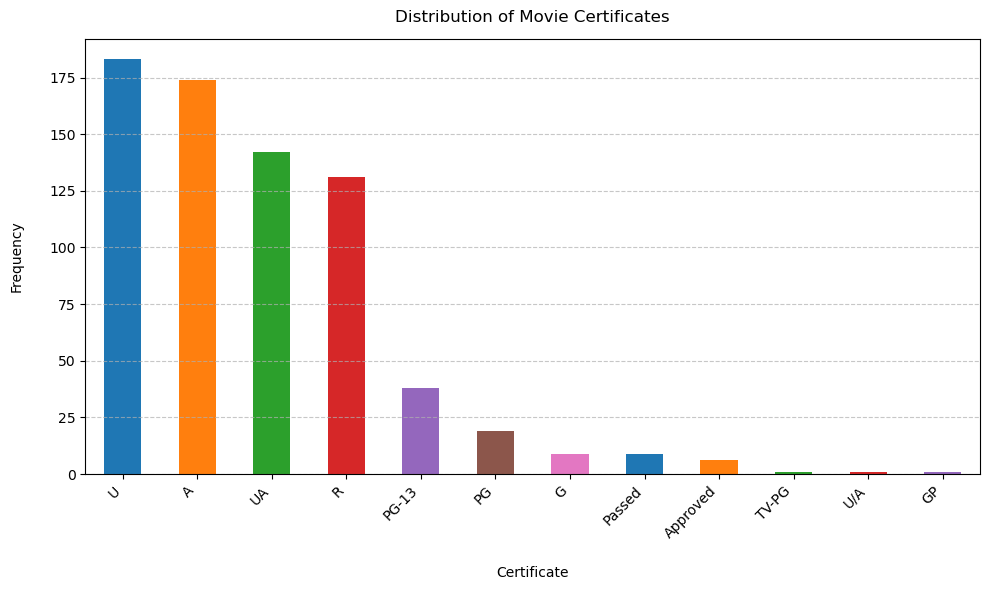

In [39]:
def bar_chart_movie_certificates(data):
    """
    Create a bar chart comparing movie certificates.

    Parameters:
    data (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Calculate the count of each certificate category
    certificate_counts = data['Certificate'].value_counts()

    # Define colors for each certificate category
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

    # Plot the bar chart with predefined colors
    plt.figure(figsize=(10, 6))
    certificate_counts.plot(kind='bar', color=colors)

    #Adding labels and title with appropriate padding
    plt.xlabel('Certificate', labelpad=18)
    plt.ylabel('Frequency', labelpad=18)
    plt.title('Distribution of Movie Certificates', pad=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    # Display the plot
    plt.show()

#call the function bar_chart_movie_certificates
bar_chart_movie_certificates(data)

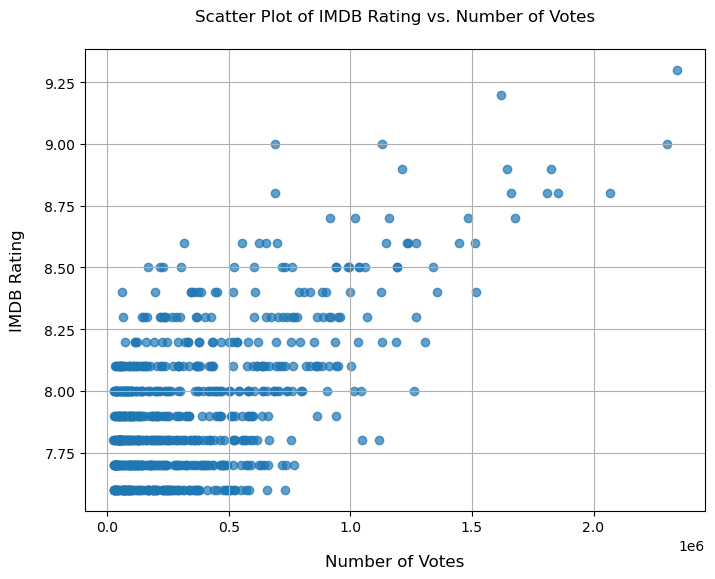

In [40]:
# Function to create scatter plot of IMDb rating vs number of votes
def scatter_plot_IMDB_vs_votes(data):
    """
    Create a scatter plot of 'IMDB_Rating' vs 'No_of_Votes'.

    Parameters:
    data (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Plot Scatter plot of 'IMDB_Rating' vs 'No_of_Votes'
    plt.figure(figsize=(8, 6))
    plt.scatter(data['No_of_Votes'], data['IMDB_Rating'], color='#1f77b4', alpha=0.7)

    # Adding labels and title with appropriate padding
    plt.xlabel('Number of Votes', labelpad=14, fontsize=12)
    plt.ylabel('IMDB Rating', labelpad=14, fontsize=12)
    plt.title('Scatter Plot of IMDB Rating vs. Number of Votes', pad=20, fontsize=12)

    # Adding grid lines for better readability
    plt.grid(True)

    # Displaying the plot
    plt.show()

#call the function scatter_plot_IMDB_vs_votes
scatter_plot_IMDB_vs_votes(data)

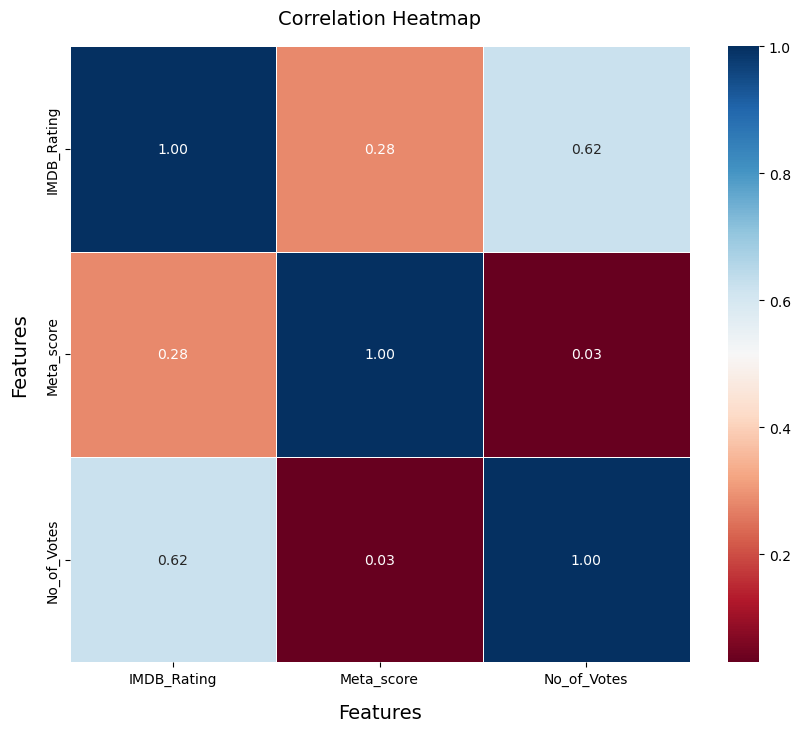

In [41]:
def correlation_heatmap(data):
    """
    Create a correlation heatmap for selected numerical columns.

    Parameters:
    data (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """

    # Selecting numerical columns for correlation analysis
    numeric_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']

    # Compute correlation matrix
    correlation_matrix = data[numeric_columns].corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap', pad = 16, fontsize = 14)
    plt.xlabel('Features', labelpad = 12, fontsize = 14)
    plt.ylabel('Features', labelpad = 12, fontsize = 14)
    plt.show()  

#call the function correlation_heatmap
correlation_heatmap(data)

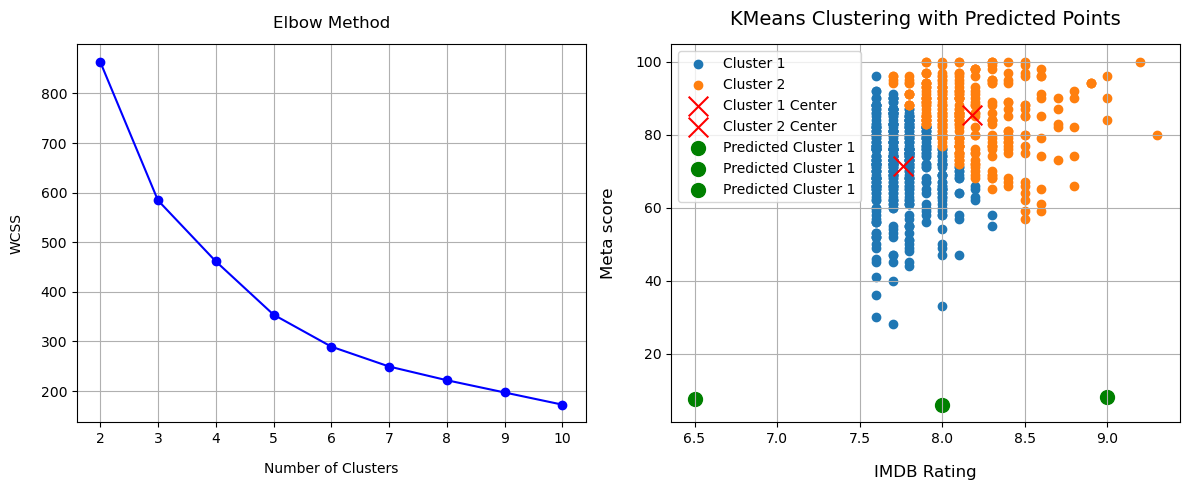

In [59]:
def kmeans_clustering_prediction(data):
    """
    Perform KMeans clustering on the selected features, predict cluster membership for new points,
    and plot the clusters along with their centroids, predicted points, and the elbow method.

    Parameters:
    data (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Extract the selected features for clustering
    X = data[['IMDB_Rating', 'Meta_score']].values

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Find optimal number of clusters using the elbow method and silhouette score
    max_clusters = 10
    wcss = []
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    # Determine the optimal number of clusters based on the elbow method
    optimal_clusters = np.argmin(np.gradient(wcss)) + 2  # Find the "elbow" point

    # Perform KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(X_scaled)

    # Back-scale the cluster centers
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

    # Generate several predicted points
    x_pred = np.array([[6.5, 7.5], [8.0, 6.0], [9.0, 8.0]])  # Example predicted points
    y_pred = kmeans.predict(scaler.transform(x_pred))

    # Plot the elbow method
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters', labelpad = 12)
    plt.ylabel('WCSS', labelpad = 12)
    plt.title('Elbow Method', pad = 12)
    plt.grid(True)

    # Plot clusters along with their centroids and predicted points
    plt.subplot(1, 2, 2)
    for i in range(optimal_clusters):
        cluster_points = X[kmeans.labels_ == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

    # Plot centroids
    for i, center in enumerate(cluster_centers):
        plt.scatter(center[0], center[1], c='red', marker='x', s=200, label=f'Cluster {i+1} Center')

    # Plot predicted points
    for i, (point, label) in enumerate(zip(x_pred, y_pred)):
        plt.scatter(point[0], point[1], color='green', marker='o', s=100, label=f'Predicted Cluster {label+1}')

    # Adding labels and title with appropriate padding
    plt.title('KMeans Clustering with Predicted Points', fontsize=14, pad = 14)
    plt.xlabel('IMDB Rating', labelpad=14, fontsize=12)
    plt.ylabel('Meta score', labelpad=14, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to perform KMeans clustering
kmeans_clustering_prediction(data)

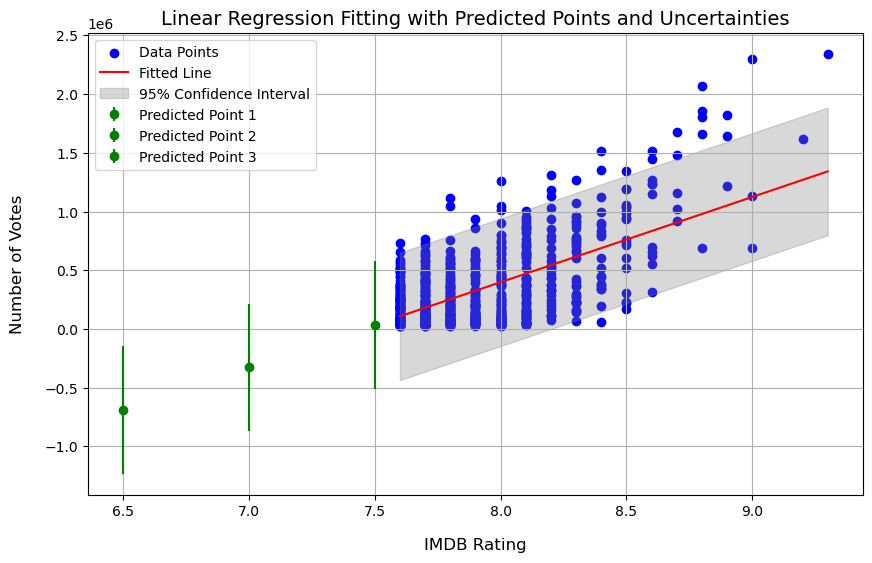

In [52]:
# Function to perform linear regression and plot the fitted line along with predictions and uncertainties
def linear_regression_fitting_prediction(data):
    """
    Perform linear regression on the provided data and plot the fitted line along with the confidence interval, error bars,
    and several predicted points with associated uncertainties.

    Parameters:
    data (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Generate some sample data for line fitting
    X_line = np.array(data['IMDB_Rating']).reshape(-1, 1)
    y_line = np.array(data['No_of_Votes'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_line, y_line, test_size=0.2, random_state=42)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_line)

    # Calculate residuals and standard deviation of residuals
    residuals = y_line - y_pred
    std_dev = np.std(residuals)

    # Calculate confidence interval (95% confidence level)
    alpha = 0.05
    t_value = stats.t.ppf(1 - alpha / 2, len(X_line) - 2)  # t-value for two-tailed test
    margin_of_error = t_value * std_dev

    # Plot the data points, the fitted line, confidence interval, and predicted points with uncertainties
    plt.figure(figsize=(10, 6))
    plt.scatter(X_line, y_line, color='blue', label='Data Points')
    plt.plot(X_line, y_pred, color='red', label='Fitted Line')

    # Calculate confidence interval for each prediction
    y_pred_upper = y_pred + margin_of_error
    y_pred_lower = y_pred - margin_of_error

    # Plot error bars for the fitted line
    plt.fill_between(X_line.flatten(), y_pred_lower, y_pred_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

    # Generate and plot several predicted points with uncertainties
    x_pred = np.array([[6.5], [7.0], [7.5]])  # Example predicted points
    y_pred = model.predict(x_pred)
    for i, (x, y) in enumerate(zip(x_pred, y_pred)):
        plt.errorbar(x, y, yerr=margin_of_error, fmt='o', color='green', label=f'Predicted Point {i+1}')

    # Adding labels and title with appropriate padding
    plt.title('Linear Regression Fitting with Predicted Points and Uncertainties', fontsize=14)
    plt.xlabel('IMDB Rating', labelpad=14, fontsize=12)
    plt.ylabel('Number of Votes', labelpad=14, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

#call the function linear_regression_fitting_prediction
linear_regression_fitting_prediction(data)